## IMPORT

In [47]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

## READ FILE

In [48]:
rating = pd.read_csv('https://raw.githubusercontent.com/afrizalrizqi/ProjectMachineLearning/main/dataset/tourism_rating.csv')
place = pd.read_csv('https://raw.githubusercontent.com/afrizalrizqi/ProjectMachineLearning/main/dataset/tourism_with_id.csv')
user = pd.read_csv('https://raw.githubusercontent.com/afrizalrizqi/ProjectMachineLearning/main/dataset/user.csv')

In [49]:
rating.tail()

,User_Id,Place_Id,Place_Ratings
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4
9999,300,163,2


In [50]:
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [51]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


## DATA PREPARATION

In [52]:
rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [53]:
place.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [54]:
user.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [55]:
place = place.drop(['Time_Minutes','Coordinate','Lat','Long','Unnamed: 11', "Unnamed: 12"], axis=1)
place

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6


In [56]:
place.isnull().sum()

Place_Id       0
Place_Name     0
Description    0
Category       0
City           0
Price          0
Rating         0
dtype: int64

In [57]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Price        437 non-null    int64  
 6   Rating       437 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 24.0+ KB


In [58]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [59]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [60]:
place.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [61]:
place.City.unique()

array(['Jakarta', 'Yogyakarta', 'Bandung', 'Semarang', 'Surabaya'],
      dtype=object)

In [62]:
place.Rating.value_counts()

4.5    98
4.4    98
4.6    75
4.3    47
4.7    37
4.2    20
4.1    20
4.0    18
4.8    10
5.0     4
4.9     4
3.9     3
3.8     2
3.4     1
Name: Rating, dtype: int64

In [63]:
user.Location.unique()

array(['Semarang, Jawa Tengah', 'Bekasi, Jawa Barat',
       'Cirebon, Jawa Barat', 'Lampung, Sumatera Selatan',
       'Jakarta Utara, DKI Jakarta', 'Jakarta Selatan, DKI Jakarta',
       'Bandung, Jawa Barat', 'Surabaya, Jawa Timur', 'Yogyakarta, DIY',
       'Bogor, Jawa Barat', 'Depok, Jawa Barat',
       'Jakarta Pusat, DKI Jakarta', 'Jakarta Timur, DKI Jakarta',
       'Subang, Jawa Barat', 'Jakarta Barat, DKI Jakarta',
       'Palembang, Sumatera Selatan', 'Sragen, Jawa Tengah',
       'Ponorogo, Jawa Timur', 'Klaten, Jawa Tengah', 'Solo, Jawa Tengah',
       'Tanggerang, Banten', 'Serang, Banten', 'Cilacap, Jawa Tengah',
       'Kota Gede, DIY', 'Karawang, Jawa Barat', 'Purwakarat, Jawa Barat',
       'Nganjuk, Jawa Timur', 'Madura, Jawa Timur'], dtype=object)

## DATA PREPROCESSING

In [64]:
all_data = np.concatenate((
    place.Place_Id.unique(),
    rating.Place_Id.unique()
))

all_data

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [65]:
all_data = np.sort(np.unique(all_data))
print(f"Total number of tourism: {len(all_data)}")

Total number of tourism: 437


In [66]:
all_data_rating = rating
all_data_rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [67]:
all_data = pd.merge(all_data_rating, place[["Place_Id", "Place_Name","Description","City","Category","Rating","Price"]], on="Place_Id",how='left')
all_data

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Rating,Price
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,4.6,75000
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,4.1,3000
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,4.5,94000
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,4.5,10000
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,4.0,0
...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,4.1,35000
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,4.7,2000
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,4.3,25000
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,4.8,0


In [68]:
all_data

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Rating,Price
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,4.6,75000
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,4.1,3000
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,4.5,94000
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,4.5,10000
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,4.0,0
...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,4.1,35000
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,4.7,2000
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,4.3,25000
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,4.8,0


In [69]:
preparation= all_data.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Rating,Price
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,4.6,75000
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,4.1,3000
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,4.5,94000
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,4.5,10000
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,4.0,0
...,...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,4.2,5000
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,4.0,5000
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,4.5,150000
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,4.5,4000


In [70]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

place_category = preparation.Category.tolist()

price = preparation.Price.tolist()

In [71]:
data_baru = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "description":place_desc,
    "city":place_city,
    "category":place_category,
    "price":price
})

data_baru

,id,name,description,city,category,price
0,179,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,75000
1,344,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,3000
2,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,94000
3,373,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,10000
4,101,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,0
...,...,...,...,...,...,...
432,370,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,5000
433,350,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,5000
434,10,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,150000
435,7,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,4000


In [72]:
# top_10 = data_baru['id'].value_counts().reset_index()[0:10]
# top_10 = pd.merge(top_10, preparation[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# # Membuat visualisasi wisata dengan jumlah rating terbanyak
# plt.figure(figsize=(8,5))
# sns.barplot(x='Place_Id', y='Place_Name', data=top_10)
# plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
# plt.ylabel('Jumlah Rating')
# plt.xlabel('Nama Lokasi')
# plt.show()

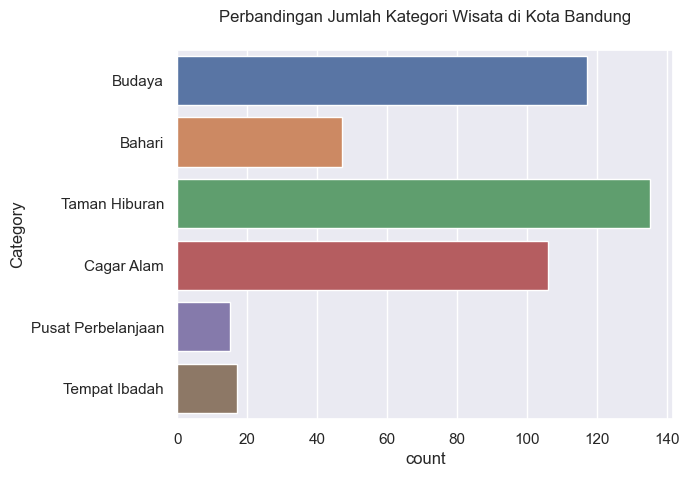

In [73]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

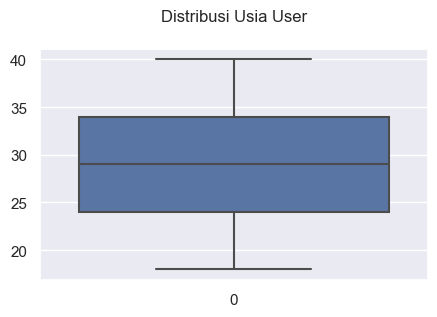

In [74]:
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

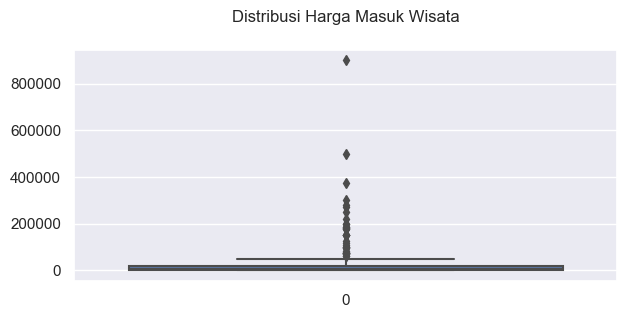

In [75]:
plt.figure(figsize=(7,3))
sns.boxplot(place['Price'])
plt.title('Distribusi Harga Masuk Wisata', pad=20)
plt.show()

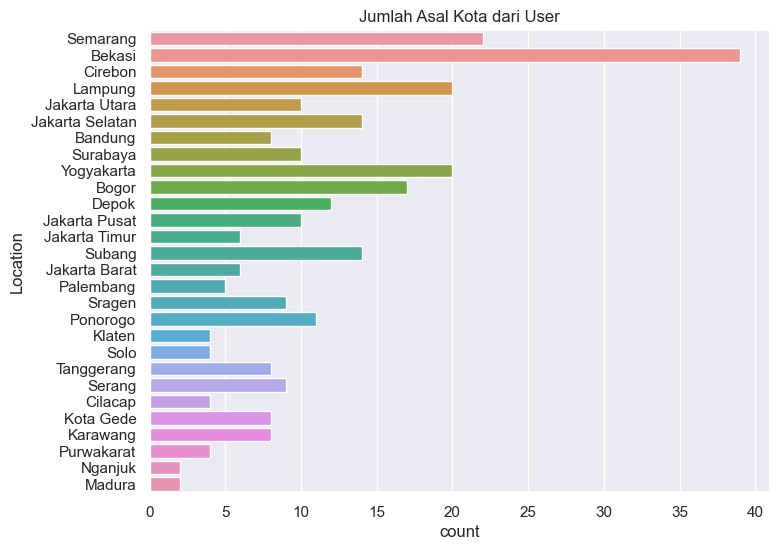

In [76]:
asal = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=asal)
plt.title('Jumlah Asal Kota dari User')
plt.show()

## COLLABORATIVE FILTERING

In [77]:
df = rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


## DATA PREPARATION
ENCODE

In [78]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [79]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [80]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [81]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


## TRAIN TEST SPLIT

In [82]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [83]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


## TRAINING

In [84]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.place_embedding = layers.Embedding(
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

In [85]:
model = RecommenderNet(num_users, num_place, 100)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## INISIALISASI CALLBACK JAGA2 RMSE

In [86]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Metriks Validasi sudah sesuai harapan')
      self.model.stop_training = True

In [87]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100


1000/1000 [==============================] - 2s 1ms/step - loss: 0.6963 - root_mean_squared_error: 0.3474 - val_loss: 0.6955 - val_root_mean_squared_error: 0.3465
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6911 - root_mean_squared_error: 0.3436 - val_loss: 0.6961 - val_root_mean_squared_error: 0.3469
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6836 - root_mean_squared_error: 0.3381 - val_loss: 0.6967 - val_root_mean_squared_error: 0.3473
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6790 - root_mean_squared_error: 0.3348 - val_loss: 0.6974 - val_root_mean_squared_error: 0.3478
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6729 - root_mean_squared_error: 0.3304 - val_loss: 0.6986 - val_root_mean_squared_error: 0.3486
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6730 - root_mean_squared_error: 0.3304 - val_loss: 0.6970 

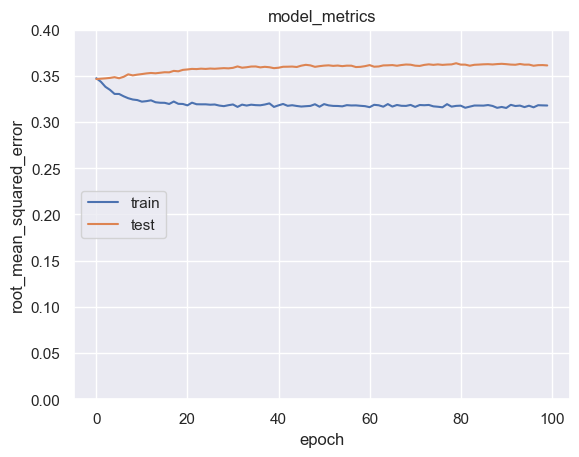

In [88]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left') #loc bisa upper left
plt.show()

## RECOMMENDATION

In [89]:
place_df = data_baru
df = pd.read_csv('https://raw.githubusercontent.com/afrizalrizqi/ProjectMachineLearning/main/dataset/tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]
print(user_id)
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)
# Filter tempat wisata berdasarkan kota, kategori, dan harga
target_city = 'Jakarta'
target_category = 'Budaya'
target_price_range = (5000,100000)  #rentang harga

place_df_target_city_category_price = place_df[
    (place_df['city'] == target_city) &
    (place_df['category'] == target_category) &
    (place_df['price'].between(target_price_range[0], target_price_range[1]))
]

place_not_visited_target_city_category_price = place_df_target_city_category_price[
    ~place_df_target_city_category_price['id'].isin(place_visited_by_user['Place_Id'].values)
]['id']

place_not_visited_target_city_category_price = list(
    set(place_not_visited_target_city_category_price)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited_target_city_category_price = [[place_to_place_encoded.get(x)] for x in place_not_visited_target_city_category_price]
user_place_array_target_city_category_price = np.hstack(
    ([[user_encoder]] * len(place_not_visited_target_city_category_price), place_not_visited_target_city_category_price)
)

74


In [90]:
print("user_place_array_target_city_category_price:", user_place_array_target_city_category_price)

# cek input data ga kosong
if len(user_place_array_target_city_category_price) == 0:
    raise ValueError("Input data is empty. Please check the filtering logic.")
else:
    ratings_target_city_category_price = model.predict(user_place_array_target_city_category_price).flatten()

top_ratings_indices_target_city_category_price = ratings_target_city_category_price.argsort()[-10:][::-1]
recommended_place_ids_target_city_category_price = [
    place_encoded_to_place.get(place_not_visited_target_city_category_price[x][0]) for x in top_ratings_indices_target_city_category_price
]

top_ratings_indices_target_city_category_price = ratings_target_city_category_price.argsort()[-10:][::-1]
recommended_place_ids_target_city_category_price = [
    place_encoded_to_place.get(place_not_visited_target_city_category_price[x][0]) for x in top_ratings_indices_target_city_category_price
]

print(f'Rekomendasi untuk user dari kota {target_city}, category {target_category} dan rentang harga {target_price_range}:')
print('===========================================================================================')
print('Tempat Wisata yang ratingnya tinggi dari user: ')
print('----------------------------------------------')

top_place_user_target_city_category_price = (
    place_visited_by_user.sort_values(
        by='Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows_target_city_category_price = place_df_target_city_category_price[
    place_df_target_city_category_price['id'].isin(top_place_user_target_city_category_price)
]
pd.DataFrame(place_df_rows_target_city_category_price)

user_place_array_target_city_category_price: [[ 73 345]
 [ 73 390]
 [ 73 269]
 [ 73 200]
 [ 73  28]
 [ 73  85]
 [ 73 235]
 [ 73  24]
 [ 73 349]
 [ 73  74]]
1/1 [==============================] - 0s 97ms/step
Rekomendasi untuk user dari kota Jakarta, category Budaya dan rentang harga (5000, 100000):
Tempat Wisata yang ratingnya tinggi dari user: 
----------------------------------------------


,id,name,description,city,category,price
341,60,Museum Tekstil,Museum cinta Tekstil menempati gedung tua di J...,Jakarta,Budaya,5000


In [91]:
print('=====================================')
print('Tempat Wisata yang direkomendasikan:')
print('=====================================')


recommended_place_target_city_category_price = place_df_target_city_category_price[
    place_df_target_city_category_price['id'].isin(recommended_place_ids_target_city_category_price)
]
pd.DataFrame(recommended_place_target_city_category_price)

Tempat Wisata yang direkomendasikan:


,id,name,description,city,category,price
24,21,Museum Wayang,Museum Wayang adalah sebuah museum yang berlok...,Jakarta,Budaya,5000
28,48,Taman Ismail Marzuki,Pusat Kesenian Jakarta Taman Ismail Marzuki ya...,Jakarta,Budaya,5000
74,24,Museum Nasional,Museum Nasional Republik Indonesia atau Museum...,Jakarta,Budaya,5000
85,82,Museum Satria Mandala,Museum Satria Mandala adalah museum sejarah pe...,Jakarta,Budaya,5000
200,42,Museum Seni Rupa dan Kramik,Museum Seni Rupa dan Keramik (Indonesia: Museu...,Jakarta,Budaya,5000
235,52,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Jakarta,Budaya,15000
269,73,Museum Perangko,Museum perangko dibangun dengan bentuk banguna...,Jakarta,Budaya,5000
345,66,Museum Layang-layang,Museum Layang-Layang adalah sebuah museum yang...,Jakarta,Budaya,10000
349,53,Rumah Sipitung,"Rumah Si Pitung di Marunda, Jakarta Utara, Ind...",Jakarta,Budaya,5000
390,39,Museum Macan (Modern and Contemporary Art in N...,Museum Seni Modern dan Kontemporer di Nusantar...,Jakarta,Budaya,100000
